In [9]:
import random
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from Net import Net

In [33]:
from content import watermark

ImportError: attempted relative import with no known parent package

In [27]:

from watermark.secret_matrix import get_watermark_from_text

get_watermark_from_text('Ettore Hidoux')

ModuleNotFoundError: No module named 'watermark'

In [34]:
from content import watermark

ModuleNotFoundError: No module named 'content'

In [16]:
T = 16
watermark = random.choices([0,1], k=T)
watermark

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]

In [68]:
text = "Hello, world!"
binary_str = ''.join(format(ord(c), '08b') for c in text)
binary_list = [int(b) for b in binary_str]

print(binary_list)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [14]:
text = "hello world"  # example text to convert
binary_string = ''.join(format(ord(c), '08b') for c in text)  # convert the text to a binary string
binary_list = [int(bit) for bit in binary_string]  # convert the binary string to a list of 0s and 1s
#character = chr(int(binary_string, 2))  # convert the binary string to an integer and then to a character
character = [str(bit) for bit in binary_list]
character = [character[i*8:(i+1)*8] for i in range(len(character)//8)]
character = [''.join(char) for char in character]
character = [chr(int(char, 2)) for char in character]

print(binary_string)  # prints the binary string
print(binary_list)  # prints the list of 0s and 1s
print(character) 

0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


In [2]:
model = Net(10)
model_path = '/Users/ettorehidoux/Desktop/codes projects/PA-DI-PML-H-B/models/cifar_net_20230216_003445'
model.load_state_dict(torch.load(model_path))
print('model loaded')
    
print(model.conv1.weight.detach().numpy().shape)

model loaded
(6, 3, 5, 5)


In [53]:
# work on first convolution (6, 3, 5, 5)

S, D, L = 5, 3, 6
M = S*S*D

W = model.conv1.weight.detach().numpy()
w = np.mean(W, 0)


In [54]:
w.shape

(3, 5, 5)

(array([  6.,  12.,  44., 121., 132.,  93.,  30.,   9.,   0.,   3.]),
 array([-1.3396074 , -1.0316591 , -0.72371095, -0.41576272, -0.10781453,
         0.20013368,  0.5080819 ,  0.8160301 ,  1.1239783 ,  1.4319265 ,
         1.7398747 ], dtype=float32),
 <BarContainer object of 10 artists>)

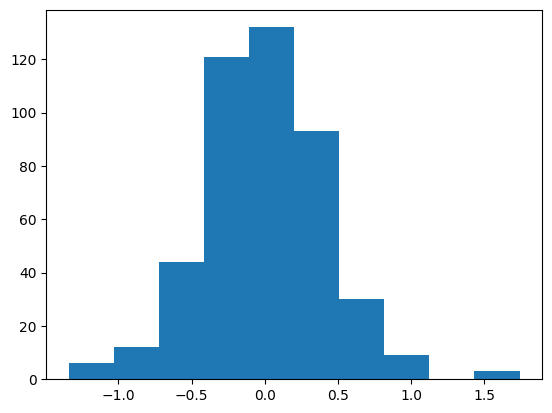

In [12]:
plt.hist(W.flatten())

(array([ 2.,  3.,  5., 35., 27.,  9.,  4.,  2.,  1.,  2.]),
 array([-0.5845492 , -0.44745004, -0.3103509 , -0.17325175, -0.0361526 ,
         0.10094655,  0.23804569,  0.37514484,  0.512244  ,  0.64934313,
         0.7864423 ], dtype=float32),
 <BarContainer object of 10 artists>)

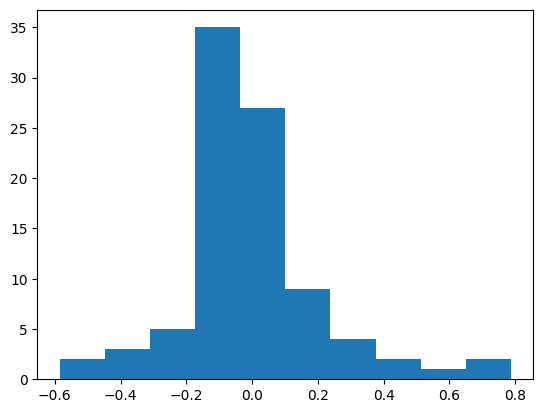

In [14]:
plt.hist(w.flatten())

In [26]:
for _ in range(T):
    k = random.choice(range(M))
    print(k)

6
71
15
26
14
48
63
41
7
52
0
73
71
37
27
22


In [22]:
np.zeros((T, M))

(75,)

In [40]:
def get_secret_matrix(type: str, size: tuple):
    T, M = size
    if type == "direct":
        x = np.zeros(size)
        for i in range(T):
            j = random.choice(range(M))
            x[i][j] = 1
            
    if type == "diff":
        x = np.zeros(size)
        for i in range(T):
            j1, j2 = random.sample(range(M), 2)
            x[i][j1] = 1
            x[i][j2] = -1
    
    if type == "rand":
        x = np.random.uniform(size=size)
        
    return x

# get_secret_matrix("rand", T, M)
        

In [43]:
X = get_secret_matrix('direct', (T, M))
#X

In [56]:
x = np.dot(X, w.flatten())
x

array([-0.09385746, -0.14125572,  0.11080915, -0.2158915 ,  0.23212419,
        0.12937208,  0.12937208,  0.08679716, -0.10268522, -0.04603146,
       -0.10268522,  0.08443541,  0.09624335, -0.07790485,  0.12552609,
       -0.07521801])

In [58]:
s = nn.Sigmoid()

x = s(torch.tensor(x))
x

tensor([0.4766, 0.4647, 0.5277, 0.4462, 0.5578, 0.5323, 0.5323, 0.5217, 0.4744,
        0.4885, 0.4744, 0.5211, 0.5240, 0.4805, 0.5313, 0.4812],
       dtype=torch.float64)

In [62]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and the predicted
    probabilities.

    Parameters:
    y_true (numpy array): True labels, one-hot encoded.
    y_pred (numpy array): Predicted probabilities.

    Returns:
    float: The cross-entropy loss.
    """
    n = len(y_true)
    return -(1/n) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [66]:
cross_entropy_loss(np.array(watermark), x.numpy())

0.6685159166375839

In [ ]:
#E(w) = E0(w) + λER(w),

criterion_0 = ...
criterion_r = ...
y = 0.3

In [15]:
import numpy as np 

np.load('/Users/ettorehidoux/Desktop/codes projects/PA-DI-PML-H-B/models/matrix_20230221_115904.npy')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])